**Written and Directed by:** *Κωστόπουλος Κωνσταντίνος 03117043*

# **Συστήματα και Τεχνολογίες Γνώσης**
# **Θέμα 1**
Στο θέμα αυτό θα αναπτύξετε έναν γράφο γνώσης τον οποίο στη συνέχεια θα αξιοποιήσετε για ένα σύστημα συστάσεων (recommender system) που θα προτείνει ταινίες σε χρήστες.


## 1ο Μέρος: Εξοικείωση με το προγραμματιστικό περιβάλλον


Σε αυτό το μέρος θα δούμε πως μπορούμε να δημιουργήσουμε και να εμπλουτίσουμε ένα γράφο γνώσης, να συνδέσουμε πολλαπλούς γράφους καθώς και να διατυπώνουμε SPARQL ερωτήματα, μέσα από το προγραμματιστικό περιβάλλον του notebook.

Σας δίνεται ένας πολύ απλός γράφος γνώσης στο αρχείο lotr.nt, ο οποίος αποτελείται από τις παρακάτω τριάδες

```xml
<http://example.org/ns/tt0325980> <http://example.org/props/country> <http://example.org/ns/USA> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sean_Astin> .
<http://example.org/ns/tt0325980> <http://example.org/props/director> <http://example.org/ns/Gore_Verbinski> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Cate_Blanchett> .
<http://example.org/ns/tt0120737> <http://example.org/props/budget> "$ 93000000"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/tt0120737> <http://example.org/props/country> <http://example.org/ns/New_Zealand> .
<http://example.org/ns/tt0120737> <http://example.org/props/country> <http://example.org/ns/USA> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sala_Baker> .
<http://example.org/ns/tt0325980> <http://example.org/props/actor> <http://example.org/ns/Orlando_Bloom> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Sean_Bean> .
<http://example.org/ns/tt0120737> <http://example.org/props/director> <http://example.org/ns/Peter_Jackson> .
<http://example.org/ns/tt0325980> <http://example.org/props/budget> "$ 140000000"^^<http://www.w3.org/2001/XMLSchema#integer> .
<http://example.org/ns/tt0120737> <http://example.org/props/actor> <http://example.org/ns/Orlando_Bloom> .
<http://example.org/ns/tt0325980> <http://example.org/props/title> "Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl"^^<http://www.w3.org/2001/XMLSchema#string> .
<http://example.org/ns/tt0120737> <http://example.org/props/title> "The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"^^<http://www.w3.org/2001/XMLSchema#string> .
```
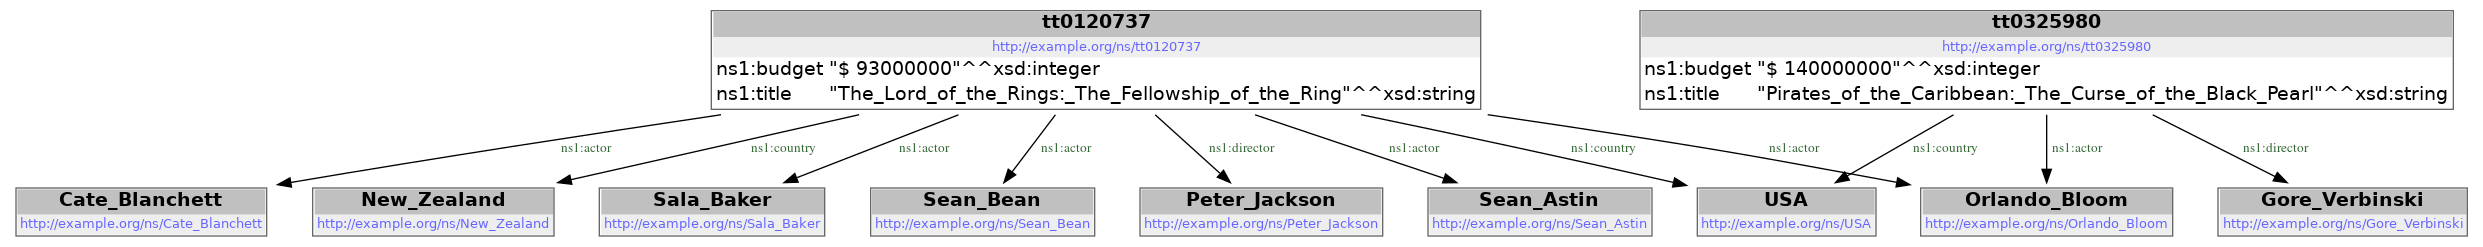




Ο γράφος αυτός περιέχει πληροφορίες για δύο ταινίες, την τοποθεσία που γυρίστηκαν, το σκηνοθέτη τους και κάποιους από τους ηθοποιούς. Χρησιμοποιεί δύο 'τεχνητούς' χώρους ονομάτων: http://example.org/ns/ και http://example.org/props/ όπου στον πρώτο ορίζονται τα ονόματα των οντοτήτων ενώ στο δεύτερο τα ονόματα των ιδιοτήτων τους.

Στην python μπορούμε να φορτώσουμε το γράφο με χρήση της βιβλιοθήκης rdflib.

In [1]:
!pip install rdflib

In [2]:
from rdflib import Graph, Literal, URIRef, Namespace

## Αρχικοποίηση ενός κενού γράφου
g = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g.parse('lotr.nt',format='nt')

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)
for (s,p,o) in g:
  print(s,p,o)

All nodes of the graph:
http://example.org/ns/Sean_Astin
The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
http://example.org/ns/Gore_Verbinski
http://example.org/ns/Sala_Baker
http://example.org/ns/New_Zealand
http://example.org/ns/tt0325980
http://example.org/ns/Cate_Blanchett
Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl
$ 93000000
http://example.org/ns/Peter_Jackson
http://example.org/ns/Sean_Bean
$ 140000000
http://example.org/ns/tt0120737
http://example.org/ns/USA
http://example.org/ns/Orlando_Bloom
http://example.org/ns/tt0120737 http://example.org/props/actor http://example.org/ns/Cate_Blanchett
http://example.org/ns/tt0120737 http://example.org/props/country http://example.org/ns/USA
http://example.org/ns/tt0325980 http://example.org/props/budget $ 140000000
http://example.org/ns/tt0120737 http://example.org/props/actor http://example.org/ns/Orlando_Bloom
http://example.org/ns/tt0120737 http://example.org/props/budget $ 93000000
http://example.org/ns/tt0120737 http://

Στο γράφο αυτό μπορούμε να διατυπώνουμε SPARQL ερωτήματα όπως φαίνεται στο παρακάτω κελί. 

Σε ποιες ταινίες παίζει ο Orlando Bloom?

In [3]:
## Τα prefixes τα ορίζουμε στην αρχή του ερωτήματος για να μην κουβαλάμε τα namespaces μέσα στο ερώτημα

##δουλεύει και χωρίς distinct προφανώς.
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?title
       WHERE {
          ?movie exp:actor ex:Orlando_Bloom .
          ?movie exp:title ?title
       }""")
for a in ans:
  print(a)

(rdflib.term.Literal('Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)
(rdflib.term.Literal('The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')),)


Στο γράφο επίσης μπορούμε να προσθέσουμε τριάδες

π.χ. για να προσθέσουμε το γεγονός πως ο Ian McKellen παίζει στο Lord of the Rings

In [4]:
## Ορίζουμε τους χώρους ονομάτων
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

## URI της ταινίας
a = URIRef(ns1+"tt0120737")

## URI της ιδιότητας "έχει ηθοποιό"
b = URIRef(ns2+"actor")

## URI του Ian McKellen
c = URIRef(ns1+"Ian_McKellen")

## Προσθήκη της τριάδας a,b,c στο γράφο
g.add((a,b,c))

## Εκτύπωση όλων των κόμβων
print("All nodes of the graph:")
for node in g.all_nodes():
  print(node)

All nodes of the graph:
http://example.org/ns/Sean_Astin
The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring
http://example.org/ns/Gore_Verbinski
http://example.org/ns/Sala_Baker
http://example.org/ns/New_Zealand
http://example.org/ns/tt0325980
Pirates_of_the_Caribbean:_The_Curse_of_the_Black_Pearl
http://example.org/ns/Cate_Blanchett
$ 93000000
http://example.org/ns/Peter_Jackson
http://example.org/ns/Sean_Bean
$ 140000000
http://example.org/ns/tt0120737
http://example.org/ns/USA
http://example.org/ns/Orlando_Bloom
http://example.org/ns/Ian_McKellen


Παρατηρήστε πως ο κόμβος που αναφέρεται στην οντότητα της ταινίας έχει URI <<http://example.org/ns/tt0120737>> και όχι <<http://example.org/ns/The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring>>. Ο τίτλος μιας ταινίας είναι ένα string (literal) το οποίο συνδέεται με τον αντίστοιχο κόμβο μέσω της ακμής <<http://example.org/props/title>>. Αν χρειαζόταν να βρούμε το όνομα του συγκεκριμένου κόμβου θα μπορούσαμε να το κάνουμε μέσω SPARQL

In [5]:
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
       WHERE {
          ?movie exp:title "The_Lord_of_the_Rings:_The_Fellowship_of_the_Ring"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt0120737'),)


όπου το ^^xsd:string υποδηλώνει πως αναφερόμαστε σε literal τύπου string

### Ερώτημα 1.1

Δημιουργήστε έναν νέο γράφο γνώσης (g2) από πληροφορίες που θα βρείτε ψάχνοντας στο διαδίκτυο, όμοιο με αυτόν που σας δίνεται, στον οποίο:
- Θα χρησιμοποιούνται τα ίδια namespaces με τον γράφο που δίνεται
- Θα περιέχονται 10 με 20 τριάδες
- Θα περιέχονται τουλάχιστον δύο ταινίες διαφορετικές από αυτές που περιέχονται στο γράφο που δίνεται
- Τουλάχιστον ένας κόμβος του γράφου θα έχει ίδιο URI με έναν κόμβο του γράφου που δίνεται, δηλαδή θα αναφέρεται στο ίδιο αντικείμενο του κόσμου (πχ ένας ηθοποιός ή ένας σκηνοθέτης) 

Στη συνέχεια θα διατυπώσετε δύο SPARQL ερωτήματα της επιλογής σας στο γράφο αυτόν, και θα εκτυπώσετε τις απαντήσεις. Περιγράψτε τι κάνει το κάθε ένα από αυτά τα ερωτήματα.

Μπορείτε να δημιουργήσετε το γράφο είτε μέσω του κώδικα όπως δείξαμε και παραπάνω, είτε δημιουργώντας τοπικά ένα αρχείο 'ntriples' (.nt), γράφοντας "με το χέρι" τις τριάδες με τη μορφή που είναι και στο lotr.nt,  και μετά φορτώνοντας το αρχείο στο notebook, όπως παρουσιάσαμε και για το δοθέν αρχείο (Graph.parse()). Σε περίπτωση που δημιουργήσετε το νέο γράφο μέσω κώδικα, μην ξεχάσετε να αποθηκεύσετε το γράφο σε ένα αρχείο με κωδικοποίηση 'ntriples' τρέχοντας την εντολή
```python
g2.serialize(destination='mygraph.nt', format='nt')
```
Εκτυπώστε όλες τις τριάδες του γράφου.

In [6]:
## Solution 1.1

g2 = Graph()

## Διάβασμα του αρχείου και προσθήκη στο γράφο
g2.parse('mygraph.nt',format='nt')
print("All nodes of the graph:")
for node in g2.all_nodes():
  print(node)

All nodes of the graph:
Black_Death
Parasite
http://example.org/ns/tt7653254
Bohemian_Rhapsody
http://example.org/ns/Rami_Malek
http://example.org/ns/Germany
http://example.org/ns/South_Korea
http://example.org/ns/Noah_Baumbach
http://example.org/ns/UK
http://example.org/ns/tt1727824
http://example.org/ns/Bong_Joon_Ho
http://example.org/ns/Song_Kang_Ho
http://example.org/ns/Christopher_Smith
http://example.org/ns/Bryan_Singer
http://example.org/ns/tt6751668
Marriage_Story
http://example.org/ns/Adam_Driver
http://example.org/ns/tt1181791
http://example.org/ns/Sean_Bean
http://example.org/ns/USA


In [7]:
##SPARQL query 1

##Επιλέγει τον κόμβο-θέμα που αντιστοιχεί στην ταινία Parasite μέσω της ακμής <http://example.org/props/>

ans=g2.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?movie
       WHERE {
          ?movie exp:title "Parasite"^^xsd:string .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt6751668'),)


In [8]:
##SPARQL query 2

##Επιλέγει τον κόμβο που αντιστοιχεί στην ταινία Parasite μέσω της ακμής <http://example.org/props/> και, στη συνέχεια, επιλέγει 
##ηθοποιό που παίζει στην ταινία.

ans=g2.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?movie ?actor
       WHERE {
          ?movie exp:title "Parasite"^^xsd:string .
          ?movie exp:actor ?actor .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt6751668'), rdflib.term.URIRef('http://example.org/ns/Song_Kang_Ho'))


### Ερώτημα 1.2

Σε έναν νέο γράφο θα φορτώσετε και τα δύο αρχεία (mygraph.nt, lotr.nt) και θα διατυπώσετε ένα SPARQL ερώτημα στην απάντηση του οποίου να φαίνεται πως οι δύο γράφοι είναι συνδεδεμένοι.

Για να φορτώσετε δύο αρχεία στον ίδιο γράφο τρέχετε τις εντολές
```
g = Graph()
g.parse('lotr.nt',format='nt')
g.parse('mygraph.nt',format='nt')
```

In [9]:
## Solution 1.2

g = Graph()
g.parse('lotr.nt',format='nt')
g.parse('mygraph.nt',format='nt')


#Το παρακάτω query μάς δείχνει ότι οι γράφοι g1, g2 είναι πράγματι συνδεδεμένοι. Επιλέγοντας όλες τις ταινίες στις οποίες συμμετείχε ο 
# Sean Bean, παίρνω ως αποτέλεσμα τόσο την Lord of the Rings ταινία (g1 graph), όσο και την Black Death (g2)

ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?movie
       WHERE {
          ?movie exp:actor ex:Sean_Bean .
       }""")
for a in ans:
  print(a)

(rdflib.term.URIRef('http://example.org/ns/tt0120737'),)
(rdflib.term.URIRef('http://example.org/ns/tt1181791'),)


## 2o Μέρος: Ανάπτυξη γράφου γνώσης



Σε αυτό το μέρος θα αναπτύξετε το γράφο γνώσης που θα χρησιμοποιηθεί για το σύστημα συστάσεων, αξιοποιώντας ετερογενή δεδομένα από διαφορετικές πηγές. Συγκεκριμένα θα συλλέξετε δεδομένα από:
- Το αρχείο movies.csv που σας δίνεται, το οποίο είναι υποσύνολο του kaggle dataset που βρίσκεται [εδώ](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset)
- Το γράφο γνώσης [Wikidata](https://www.wikidata.org/wiki/Wikidata:Main_Page)

Για την εξαγωγή πληροφορίας από το csv αρχείο μπορείτε να χρησιμοποιήσετε τη βιβλιοθήκη [pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

In [10]:
import pandas as pd
df = pd.read_csv('movies.csv')
#print(df.head())
print(df.shape)

(528, 23)


Με την παραπάνω εντολή φορτώσαμε το περιεχόμενο του αρχείου σε ένα *dataframe* το οποίο είναι ουσιαστικά ένας πίνακας. Κάθε στήλη του πίνακα είναι ένα pandas Series - ουσιαστικά μια λίστα. Για να πάρουμε το i-οστό στοιχείο μιας στήλης μπορούμε να γράψουμε (πχ. για τη στήλη 'director'):
```python
director = df['director'][i]
```
Για να πάρουμε πχ. όλα τα ζεύγη ταινιών και σκηνοθετών θα γράφαμε:
```python
for i in range(df.shape[0]):
  movie = df['original_title'][i]
  director = df['director'][i]
```
Τέλος μπορούμε να φιλτράρουμε ένα dataframe και να κρατήσουμε όσες γραμμές του πίνακα ικανοποιούν κάποια συνθήκη. πχ για να πάρουμε όλες τις γραμμές που αναφέρονται σε ταινίες που περιέχουν τον Ian McKellen στους ηθοποιούς:

```python
df_ian = df[df['actors'].str.contains('Ian McKellen')]
```

Γενικά τα pandas είναι μια πολύ δυνατή βιβλιοθήκη με πάρα πολλές λειτουργίες, και θα βρείτε πολύ υλικό στο διαδίκτυο (documentation, tutorials, παραδείγματα) εάν θέλετε να το ψάξετε παραπάνω.

In [11]:
movies = pd.read_csv('movies.csv')
directors = movies['director'][5].split(',')
directors = [g.replace(' ','_') for g in directors]
print(directors)

['Frederick_Stephani', '_Ray_Taylor']


In [12]:
movies = pd.read_csv('movies.csv')
directors = movies['director'][0]
#directors = movies['director'][0].split(',')
directors = movies['director'][0].split(' ')
directors = [g.replace(' ','_') for g in directors]
print(directors)

['Donald', 'Crisp']


In [13]:
title = movies['title'][5].replace(' ','_')
#title = title.split(' ')
#title = movies
print(title)

Flash_Gordon


In [14]:
title = movies['title'][5].split(',')
title = [g.replace(' ','_') for g in title]
print(title)

['Flash_Gordon']


In [15]:
production_company = movies['production_company'][5].split(',')
production_company = [g.replace(' ','_') for g in production_company]
print(production_company)

['Universal_Pictures_Corporation']


In [16]:
year=str(movies['year'][5]).split(',')
print(year)

['1936']


In [17]:
genres = movies['genre'][5].split(', ')
genres = [g.replace(' ','_') for g in genres]
for d in genres:
    print(d)

Action
Adventure
Sci-Fi


In [18]:
date_published = movies['date_published'][5].replace('-','_')
print(date_published)

1936_04_06


In [19]:
production_company = (movies['production_company'][5].replace(' ','_')).replace('-','_')
print(production_company)

Universal_Pictures_Corporation


In [20]:
description = ((movies['description'][3].replace("'", "COSTOPOULOS")).replace(', ','COMMA')).replace(' ','_')
print(description)

Two_young_women_find_their_friendship_strained_when_one_wins_a_role_in_a_Broadway_showCOMMAand_the_otherCOSTOPOULOSs_boyfriend_begins_to_fall_for_her.


In [21]:
avg_vote = movies['avg_vote'][3]
print(avg_vote)

6.5


In [22]:
movies = pd.read_csv('movies.csv')#, keep_default_na=False)
movies.fillna("", inplace=True)
metascore = movies['metascore'][5]
if metascore=='':
    print("empty")
else:
    print("lmao")

empty


In [23]:
mylist=[]
mylist.append(metascore)
mylist.append(production_company)
print(mylist)

['', 'Universal_Pictures_Corporation']


In [24]:
year=str(movies['year'][5])
print(year)

1936


In [25]:
budget = movies['budget'][2]
print(budget)

$ 291000


In [26]:
movies = pd.read_csv('movies.csv')
movies.fillna("", inplace=True)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')
tempg = Graph()
for i in range(3):
    mov_id = movies['imdb_title_id'][i]
    genres = movies['genre'][i].split(', ')
    genres = [tempg.replace(' ','_') for tempg in genres]
    
    a = URIRef(ns1+mov_id)
    b = URIRef(ns2+'genre')
    for d in genres:
        c = URIRef(ns1+d)
        tempg.add((a,b,c))
    

In [27]:
for s,p,o in tempg:
    print(s,p,o)

http://example.org/ns/tt0015758 http://example.org/props/genre http://example.org/ns/Adventure
http://example.org/ns/tt0021884 http://example.org/props/genre http://example.org/ns/Drama
http://example.org/ns/tt0015758 http://example.org/props/genre http://example.org/ns/Romance
http://example.org/ns/tt0021884 http://example.org/props/genre http://example.org/ns/Horror
http://example.org/ns/tt0021884 http://example.org/props/genre http://example.org/ns/Romance
http://example.org/ns/tt0017136 http://example.org/props/genre http://example.org/ns/Sci-Fi
http://example.org/ns/tt0017136 http://example.org/props/genre http://example.org/ns/Drama


### Ερώτημα 2.1

Κατασκευάστε έναν γράφο γνώσης για όλες τις ταινίες και με όλες τις πληροφορίες που υπάρχουν στο αρχείο movies.csv που σας δίνεται.

*Προσοχή 1: Σε κάποια πεδία του csv δεν υπάρχουν καταχωρήσεις (πχ λείπουν κάποιοι σκηνοθέτες). Θα πρέπει να γίνεται έλεγχος και να το χειριστείτε κατάλληλα.*   
*Προσοχή 2: Τα κενά και ορισμένοι ειδικοί χαρακτήρες ενδέχεται να δημιουργήσουν προβλήματα στην αναπαράσταση του γράφου μέσω των βιβλιοθηκών της python, για αυτό το λόγο όπως θα δείτε και παρακάτω αντικαθιστούμε τα κενά με κάτω\_παύλα ('\_'). Συνίσταται να χρησιμοποιείτε μόνο αλφαριθμητικούς χαρακτήρες και την κάτω_παύλα για ονόματα οντοτήτων και ιδιοτήτων.*   
*Προσοχή 3: Κάποια πεδιά του csv έχουν πολλαπλές καταχωρήσεις (π.χ. ηθοποιοί) χωρισμένες με κόμμα.*

In [28]:
# Solution 2.1
## Read csvs and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD


movies = pd.read_csv('movies.csv')
movies.fillna("", inplace=True)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

g = Graph()
count=0

#even in unnecessary fields (like production_company), I use .split(',') to put the object in a list with copy-pasting code.

for i in range(movies.shape[0]):
    mov_id = movies['imdb_title_id'][i] #no list
    title = movies['title'][i].replace(' ','_') #no list
    original_title = movies['original_title'][i].replace(' ','_') #no list
    
    #year = movies['year'][i] #no list
    year = str(movies['year'][i])
    
    #date_published = movies['date_published'][i] #no list
    
    date_published = movies['date_published'][i].replace('-','_') #no list
    genres = movies['genre'][i].split(', ') #LIST
    
    #duration = movies['duration'][i] #no list
    duration = str(movies['duration'][i])
    countries = movies['country'][i].split(', ') #LIST
    languages = movies['language'][i].split(', ') #LIST
    directors = movies['director'][i].split(', ') #LIST
    writers = movies['writer'][i].split(', ') #LIST
    #production_company = movies['production_company'][i].split(',') #LIST
    #production_company = movies['production_company'][i].replace(' ','_') #no list
    production_company = (movies['production_company'][i].replace(' ','_')).replace('-','_') #no list
    actors = movies['actors'][i].split(', ') #LIST
    description = ((movies['description'][i].replace('"', "QUOTING")).replace(', ','COMMA')).replace(' ','_') #no list
    #description = ((movies['description'][i].replace('"', "QUOTING")).replace(', ','COMMA')).replace(' ','_').split(', ')
    ###################   DO DESCRIPTIONNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
    
    #avg_vote = movies['avg_vote'][i] #no list
    avg_vote = str(movies['avg_vote'][i])
    
    #votes = movies['votes'][i] #no list
    votes = str(movies['votes'][i])
    budget = movies['budget'][i].replace(' ','') #no list. Could do _ as well
    
    usa_gross_income = movies['usa_gross_income'][i].replace(' ','') #no list
    
    #worldwide_gross_income = movies['worlwide_gross_income'][i] #no list
    worldwide_gross_income = movies['worlwide_gross_income'][i].replace(' ','')
    
    #metascore = movies['metascore'][i] #no list
    metascore = str(movies['metascore'][i])
    #reviews_from_users = movies['reviews_from_users'][i] #no list
    reviews_from_users = str(movies['reviews_from_users'][i])
    #reviews_from_critics = movies['reviews_from_critics'][i] #no list
    reviews_from_critics = str(movies['reviews_from_critics'][i])
    
    genres = [g.replace(' ','_') for g in genres]
    countries = [g.replace(' ','_') for g in countries]
    languages = [g.replace(' ','_') for g in languages]
    directors = [g.replace(' ','_') for g in directors]
    writers = [g.replace(' ','_') for g in writers]
    actors = [g.replace(' ','_') for g in actors]
    
    
    #title = movies['title'][5].split(',')
    #title = [g.replace(' ','_') for g in title]
    #original_title = movies['original_title'][5].split(',')
    #original_title = [g.replace(' ','_') for g in original_title]

    a = URIRef(ns1+mov_id)
    b = URIRef(ns2+'genre')
    for d in genres:
        c = URIRef(ns1+d)
        g.add((a,b,c))

    b = URIRef(ns2+'countries')
    for d in countries:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'languages')
    for d in languages:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'directors')
    for d in directors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'writers')
    for d in writers:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'actors')
    for d in actors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'title')
    c = URIRef(ns1+title)
    g.add((a,b,c))
    
    
    # b = URIRef(ns2+'title')
    # c = URIRef(ns1+title)
    # g.add((a,b,c))
    
    b = URIRef(ns2+'original_title')
    c = URIRef(ns1+original_title)
    g.add((a,b,c))
    
    b = URIRef(ns2+'year')
    c = URIRef(ns1+year)
    g.add((a,b,c))
    
    b = URIRef(ns2+'date_published')
    c = URIRef(ns1+date_published)
    g.add((a,b,c))
    
    b = URIRef(ns2+'duration')
    c = URIRef(ns1+duration)
    g.add((a,b,c))
    
    b = URIRef(ns2+'production_company')
    c = URIRef(ns1+production_company)
    g.add((a,b,c))
    
    b = URIRef(ns2+'description')
    c = URIRef(ns1+description)
    g.add((a,b,c))
#     b = URIRef(ns2+'description')
#     for d in description:
#         c = URIRef(ns1+d)
#         g.add((a,b,c))
    
    b = URIRef(ns2+'avg_vote')
    c = URIRef(ns1+avg_vote)
    g.add((a,b,c))
    
    b = URIRef(ns2+'votes')
    c = URIRef(ns1+votes)
    g.add((a,b,c))
    
    b = URIRef(ns2+'budget')
    c = URIRef(ns1+budget)
    g.add((a,b,c))
    
    b = URIRef(ns2+'usa_gross_income')
    c = URIRef(ns1+usa_gross_income)
    g.add((a,b,c))
    
    b = URIRef(ns2+'worldwide_gross_income')
    c = URIRef(ns1+worldwide_gross_income)
    g.add((a,b,c))
    
    b = URIRef(ns2+'metascore')
    c = URIRef(ns1+metascore)
    g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_users')
    c = URIRef(ns1+reviews_from_users)
    g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_critics')
    c = URIRef(ns1+reviews_from_critics)
    g.add((a,b,c))
    
    # for s,p,o in g:
    #     print(s,p,o)
count=0
for node in g.all_nodes():
    count+=1
print(count) 
tempcount=0  
for s,p,o in g:
    tempcount+=1
print(tempcount)

print("graph has {} statements.".format(len(g)))


12088
20024
graph has 20024 statements.


In [29]:
# Solution 2.1
## Read csvs and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD


movies = pd.read_csv('movies.csv')
movies.fillna("", inplace=True)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

g = Graph()
count=0

#even in unnecessary fields (like production_company), I use .split(',') to put the object in a list with copy-pasting code.

for i in range(movies.shape[0]):
    mov_id = movies['imdb_title_id'][i] #no list
    titles = movies['title'][i].split(', ') #no list
    original_titles = movies['original_title'][i].split(', ') #no list
    
    #year = movies['year'][i] #no list
    years = str(movies['year'][i]).split(', ')
    
    #date_published = movies['date_published'][i] #no list
    
    dates_published = movies['date_published'][i].split(', ') #no list
    genres = movies['genre'][i].split(',') #LIST
    
    #duration = movies['duration'][i] #no list
    durations = str(movies['duration'][i]).split(', ')
    countries = movies['country'][i].split(', ') #LIST
    languages = movies['language'][i].split(', ') #LIST
    directors = movies['director'][i].split(', ') #LIST
    writers = movies['writer'][i].split(', ') #LIST
    production_companies = movies['production_company'][i].split(', ') #LIST
    #production_company = movies['production_company'][i].replace(' ','_') #no list
    #production_companies = ((movies['production_company'][i].replace(' ','_')).replace('-','_')).split(',') #no list
    actors = movies['actors'][i].split(', ') #LIST
    descriptions = (movies['description'][i].replace('"', "QUOTING").replace(',','COMMA').replace(' ','_')).split(', ') #no list
    
    ###################   DO DESCRIPTIONNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
    
    #avg_vote = movies['avg_vote'][i] #no list
    avg_votes = str(movies['avg_vote'][i]).split(', ')
    
    #votes = movies['votes'][i] #no list
    
    votes = str(movies['votes'][i]).split(', ')
    budgets = str(movies['budget'][i].split(', ') #no list. Could do _ as well
    usa_gross_income = (str((movies['usa_gross_income'][i]))).split(', ') #no list
    
    #worldwide_gross_income = movies['worlwide_gross_income'][i] #no list
    worldwide_gross_income = str((movies['worlwide_gross_income'][i])).split(', ')
    
    #metascore = movies['metascore'][i] #no list
    metascore = str(movies['metascore'][i]).split(', ')
    #reviews_from_users = movies['reviews_from_users'][i] #no list
    reviews_from_users = str(movies['reviews_from_users'][i]).split(', ')
    #reviews_from_critics = movies['reviews_from_critics'][i] #no list
    reviews_from_critics = str(movies['reviews_from_critics'][i]).split(', ')
    
    genres = [g.replace(' ','_') for g in genres]
    countries = [g.replace(' ','_') for g in countries]
    languages = [g.replace(' ','_') for g in languages]
    directors = [g.replace(' ','_') for g in directors]
    writers = [g.replace(' ','_') for g in writers]
    actors = [g.replace(' ','_') for g in actors]
    
    titles = [g.replace(' ','_') for g in titles]
    original_titles = [g.replace(' ','_') for g in original_titles]
    years = [g.replace(' ','_') for g in years]
    dates_published = [g.replace(' ','_') for g in dates_published]
    durations = [g.replace(' ','_') for g in durations]
    production_companies = [g.replace(' ','_') for g in production_companies]
    descriptions = [g.replace(' ','_') for g in descriptions]
    
    avg_votes = [g.replace(' ','_') for g in avg_votes]
    votes = [g.replace(' ','_') for g in votes]
    budgets = [g.replace(' ','_') for g in budgets]
    usa_gross_income = [g.replace(' ','_') for g in usa_gross_income]
    worldwide_gross_income = [g.replace(' ','_') for g in worldwide_gross_income]
    metascore = [g.replace(' ','_') for g in metascore]
    reviews_from_users = [g.replace(' ','_') for g in reviews_from_users]
    reviews_from_critics = [g.replace(' ','_') for g in reviews_from_critics]
    
    
    #title = movies['title'][5].split(',')
    #title = [g.replace(' ','_') for g in title]
    #original_title = movies['original_title'][5].split(',')
    #original_title = [g.replace(' ','_') for g in original_title]

    a = URIRef(ns1+mov_id)
    b = URIRef(ns2+'genre')
    for d in genres:
        c = URIRef(ns1+d)
        g.add((a,b,c))

    b = URIRef(ns2+'countries')
    for d in countries:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'languages')
    for d in languages:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'directors')
    for d in directors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'writers')
    for d in writers:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'actors')
    for d in actors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'title')
    for d in titles:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'original_title')
    for d in original_titles:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'year')
    for d in years:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'date_published')
    for d in dates_publisheds:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'duration')
    for d in durations:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'production_company')
    for d in production_companies:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'description')
    for d in descriptions:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'avg_vote')
    for d in avg_votes:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'votes')
    for d in votes:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'budget')
    for d in budgets:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'usa_gross_income')
    for d in usa_gross_income:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'worldwide_gross_income')
    for d in worldwide_gross_income:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'metascore')
    for d in metascore:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_users')
    for d in reviews_from_users:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_critics')
    for d in reviews_from_critics:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    # for s,p,o in g:
    #     print(s,p,o)
    
    





SyntaxError: invalid syntax (<ipython-input-29-197d74b3ad3c>, line 52)

In [2]:
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace, XSD

movies=pd.read_csv('movies.csv')
movies.fillna("UNK", inplace=True)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')
mycount=0
count1=0
g=Graph()
for i in range(movies.shape[0]):
    mov_id=movies['imdb_title_id'][i]
    titles=movies['title'][i].split(', ')
    original_titles=movies['original_title'][i].split(', ')
    years=str(movies['year'][i]).split(', ')
    dates_published=movies['date_published'][i].split(', ')
    genres=movies['genre'][i].split(', ')
    durations=str(movies['duration'][i]).split(', ')
    countries=movies['country'][i].split(', ')
    languages=movies['language'][i].split(', ')
    directors=movies['director'][i].split(', ')
    writers=movies['writer'][i].split(', ')
    production_companies=movies['production_company'][i].split(', ')
    actors=movies['actors'][i].split(', ')
    descriptions=movies['description'][i].replace('"', "QUOTING").replace(',','COMMA').replace(' ','_').split(', ')
    avg_votes=str(movies['avg_vote'][i]).split(', ')
    votes=str(movies['votes'][i]).split(', ')
    budgets=str(movies['budget'][i]).split(', ')
    usa_gross_income=str(movies['usa_gross_income'][i]).split(', ')
    worldwide_gross_income=str(movies['worlwide_gross_income'][i]).split(', ')
    metascore=str(movies['metascore'][i]).split(', ')
    reviews_from_users=str(movies['reviews_from_users'][i]).split(', ')
    reviews_from_critics=str(movies['reviews_from_critics'][i]).split(', ')

    genres = [g.replace(' ','_') for g in genres]
    countries = [g.replace(' ','_') for g in countries]
    languages = [g.replace(' ','_') for g in languages]
    directors = [g.replace(' ','_') for g in directors]
    writers = [g.replace(' ','_') for g in writers]
    actors = [g.replace(' ','_') for g in actors]
    
    titles = [g.replace(' ','_') for g in titles]
    original_titles = [g.replace(' ','_') for g in original_titles]
    years = [g.replace(' ','_') for g in years]
    dates_published = [g.replace(' ','_') for g in dates_published]
    durations = [g.replace(' ','_') for g in durations]
    production_companies = [g.replace(' ','_') for g in production_companies]
    
    avg_votes = [g.replace(' ','_') for g in avg_votes]
    votes = [g.replace(' ','_') for g in votes]
    budgets = [g.replace(' ','_') for g in budgets]
    usa_gross_income = [g.replace(' ','_') for g in usa_gross_income]
    worldwide_gross_income = [g.replace(' ','_') for g in worldwide_gross_income]
    metascore = [g.replace(' ','_') for g in metascore]
    reviews_from_users = [g.replace(' ','_') for g in reviews_from_users]
    reviews_from_critics = [g.replace(' ','_') for g in reviews_from_critics]

    a = URIRef(ns1+mov_id)
    b = URIRef(ns2+'genre')
    for d in genres:
        c = URIRef(ns1+d)
        g.add((a,b,c))

    b = URIRef(ns2+'countries')
    for d in countries:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'languages')
    for d in languages:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'directors')
    for d in directors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'writers')
    for d in writers:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'actors')
    for d in actors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'title')
    for d in titles:
        # c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'original_title')
    for d in original_titles:
        # c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'year')
    for d in years:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'date_published')
    for d in dates_published:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'duration')
    for d in durations:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'production_company')
    for d in production_companies:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'description')
    for d in descriptions:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'avg_vote')
    for d in avg_votes:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'votes')
    for d in votes:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'budget')
    for d in budgets:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'usa_gross_income')
    for d in usa_gross_income:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'worldwide_gross_income')
    for d in worldwide_gross_income:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'metascore')
    for d in metascore:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_users')
    for d in reviews_from_users:
        #c = URIRef(ns1+d)
        c = Literal(d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_critics')
    for d in reviews_from_critics:
        c = Literal(d)
        #c = URIRef(ns1+d)
        g.add((a,b,c)) 

count=0
for node in g.all_nodes(): 
    count+=1
print (count)
mycount=0
for s,p,o in g:
    mycount+=1
print(mycount)
count1=0
for s,p,o in g:
    count1+=1
print(count1)

12102
20038
20038


In [ ]:
for i in range(2):
    for s,p,o in g:
        print(s,p,o)

http://example.org/ns/tt0390614 http://example.org/props/actors http://example.org/ns/Shefali_Shah
http://example.org/ns/tt0063278 http://example.org/props/actors http://example.org/ns/Frantisek_Velecký
http://example.org/ns/tt0095956 http://example.org/props/avg_vote 5.8
http://example.org/ns/tt0445922 http://example.org/props/description The_music_of
http://example.org/ns/tt0373926 http://example.org/props/actors http://example.org/ns/Michael_Wright
http://example.org/ns/tt1227762 http://example.org/props/actors http://example.org/ns/Master_Ahan_Desai
http://example.org/ns/tt0417148 http://example.org/props/actors http://example.org/ns/Sunny_Mabrey
http://example.org/ns/tt0332379 http://example.org/props/actors http://example.org/ns/Angelo_Massagli
http://example.org/ns/tt0411267 http://example.org/props/actors http://example.org/ns/Sophie_Stuckey
http://example.org/ns/tt0166924 http://example.org/props/directors http://example.org/ns/David_Lynch
http://example.org/ns/tt1740710 http:

In [49]:
#print(movies['title'][39])
#print(movies['director'][74])
ans=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ex:tt0056801 exp:title ?title .
       }""")
for a in ans:
  print(a)

ans2=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?director
       WHERE {
          ex:tt0074184 exp:director ?director .
       }""")
for a in ans2:
  print(a)

ans3=g.query(
    """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT ?title
       WHERE {
          ex:tt0087527 exp:title ?title .
       }""")
for a in ans3:
  print(a)

(rdflib.term.Literal('8½'),)
(rdflib.term.Literal('Jönssonligan_får_guldfeber'),)


In [31]:
count1=0
for s,p,o in g :
    count1=count+1
print(count1)

12103


In [32]:
# Solution 2.1
## Read csvs and create rdf
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD


movies = pd.read_csv('movies.csv')
movies.fillna("", inplace=True)

ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')

g = Graph()
count=0

#even in unnecessary fields (like production_company), I use .split(',') to put the object in a list with copy-pasting code.

for i in range(movies.shape[0]):
    mov_id = movies['imdb_title_id'][i] #no list
    title = movies['title'][i].replace(' ','_') #no list
    original_title = movies['original_title'][i].replace(' ','_') #no list
    
    #year = movies['year'][i] #no list
    year = str(movies['year'][i])
    
    #date_published = movies['date_published'][i] #no list
    
    date_published = movies['date_published'][i].replace('-','_') #no list
    genres = movies['genre'][i].split(', ') #LIST
    
    #duration = movies['duration'][i] #no list
    duration = str(movies['duration'][i])
    countries = movies['country'][i].split(', ') #LIST
    languages = movies['language'][i].split(', ') #LIST
    directors = movies['director'][i].split(', ') #LIST
    writers = movies['writer'][i].split(', ') #LIST
    #production_company = movies['production_company'][i].split(',') #LIST
    #production_company = movies['production_company'][i].replace(' ','_') #no list
    production_company = (movies['production_company'][i].replace(' ','_')).replace('-','_') #no list
    actors = movies['actors'][i].split(', ') #LIST
    description = ((movies['description'][i].replace('"', "QUOTING")).replace(', ','COMMA')).replace(' ','_') #no list
    #description = ((movies['description'][i].replace('"', "QUOTING")).replace(', ','COMMA')).replace(' ','_').split(', ')
    ###################   DO DESCRIPTIONNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
    
    #avg_vote = movies['avg_vote'][i] #no list
    avg_vote = str(movies['avg_vote'][i])
    
    #votes = movies['votes'][i] #no list
    votes = str(movies['votes'][i])
    budget = movies['budget'][i].replace(' ','') #no list. Could do _ as well
    
    usa_gross_income = movies['usa_gross_income'][i].replace(' ','') #no list
    
    #worldwide_gross_income = movies['worlwide_gross_income'][i] #no list
    worldwide_gross_income = movies['worlwide_gross_income'][i].replace(' ','')
    
    #metascore = movies['metascore'][i] #no list
    metascore = str(movies['metascore'][i])
    #reviews_from_users = movies['reviews_from_users'][i] #no list
    reviews_from_users = str(movies['reviews_from_users'][i])
    #reviews_from_critics = movies['reviews_from_critics'][i] #no list
    reviews_from_critics = str(movies['reviews_from_critics'][i])
    
    genres = [g.replace(' ','_') for g in genres]
    countries = [g.replace(' ','_') for g in countries]
    languages = [g.replace(' ','_') for g in languages]
    directors = [g.replace(' ','_') for g in directors]
    writers = [g.replace(' ','_') for g in writers]
    actors = [g.replace(' ','_') for g in actors]
    
    
    #title = movies['title'][5].split(',')
    #title = [g.replace(' ','_') for g in title]
    #original_title = movies['original_title'][5].split(',')
    #original_title = [g.replace(' ','_') for g in original_title]

    a = URIRef(ns1+mov_id)
    b = URIRef(ns2+'genre')
    for d in genres:
        c = URIRef(ns1+d)
        g.add((a,b,c))

    b = URIRef(ns2+'countries')
    for d in countries:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'languages')
    for d in languages:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'directors')
    for d in directors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'writers')
    for d in writers:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'actors')
    for d in actors:
        c = URIRef(ns1+d)
        g.add((a,b,c))
    
    b = URIRef(ns2+'title')
    #c = URIRef(ns1+title)
    c=Literal(ns1+title)
    g.add((a,b,c))
    
    
    # b = URIRef(ns2+'title')
    # c = URIRef(ns1+title)
    # g.add((a,b,c))
    
    b = URIRef(ns2+'original_title')
    #c = URIRef(ns1+original_title)
    c=Literal(ns1+original_title)
    g.add((a,b,c))
    
    b = URIRef(ns2+'year')
    c = URIRef(ns1+year)
    g.add((a,b,c))
    
    b = URIRef(ns2+'date_published')
    c = URIRef(ns1+date_published)
    g.add((a,b,c))
    
    b = URIRef(ns2+'duration')
    #c = URIRef(ns1+duration)
    c=Literal(ns1+duration)
    g.add((a,b,c))
    
    b = URIRef(ns2+'production_company')
    c = URIRef(ns1+production_company)
    g.add((a,b,c))
    
    b = URIRef(ns2+'description')
    #c = URIRef(ns1+description)
    c=Literal(ns1+description)
    g.add((a,b,c))
#     b = URIRef(ns2+'description')
#     for d in description:
#         c = URIRef(ns1+d)
#         g.add((a,b,c))
    
    b = URIRef(ns2+'avg_vote')
    c=Literal(ns1+avg_vote)
    #c = URIRef(ns1+avg_vote)
    g.add((a,b,c))
    
    b = URIRef(ns2+'votes')
    c=Literal(ns1+votes)
    #c = URIRef(ns1+votes)
    g.add((a,b,c))
    
    b = URIRef(ns2+'budget')
    #c = URIRef(ns1+budget)
    c=Literal(ns1+budget)
    g.add((a,b,c))
    
    b = URIRef(ns2+'usa_gross_income')
    #c = URIRef(ns1+usa_gross_income)
    c=Literal(ns1+usa_gross_income)
    g.add((a,b,c))
    
    b = URIRef(ns2+'worldwide_gross_income')
    #c = URIRef(ns1+worldwide_gross_income)
    c=Literal(ns1+worldwide_gross_income)
    g.add((a,b,c))
    
    b = URIRef(ns2+'metascore')
    #c = URIRef(ns1+metascore)
    c=Literal(ns1+metascore)
    g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_users')
    #c = URIRef(ns1+reviews_from_users)
    c=Literal(ns1+reviews_from_users)
    g.add((a,b,c))
    
    b = URIRef(ns2+'reviews_from_critics')
    #c = URIRef(ns1+reviews_from_critics)
    c=Literal(ns1+reviews_from_users)
    g.add((a,b,c))
    
    # for s,p,o in g:
    #     print(s,p,o)
count=0
for node in g.all_nodes():
    count+=1
print(count) 
tempcount=0  
for s,p,o in g:
    tempcount+=1
print(tempcount)

print("graph has {} statements.".format(len(g)))


12006
20024
graph has 20024 statements.


In [33]:
import pandas as pd
from rdflib import Graph, Literal, URIRef, Namespace,XSD


movies = pd.read_csv('movies.csv')
#                      ,keep_default_na=False)   #βάζωντας το keep_default_na=False
movies.fillna("BLANKNODE",inplace=True)                                                           #για τα empty cells, ανταλάσσω τη by default τιμή nan με empty string
ns1 = Namespace('http://example.org/ns/')
ns2 = Namespace('http://example.org/props/')
count1=0
g = Graph()
# for r in (("brown", "red"), ("lazy", "quick")):
#     s = s.replace(*r)
for i in range(movies.shape[0]):
  mov_id = movies['imdb_title_id'][i]
  genres = movies['genre'][i].split(', ')
  genres = [g.replace(' ','_') for g in genres]
  titles = movies['title'][i].split(', ')
  titles = [g.replace(' ','_') for g in titles]    
  original_titles = movies['original_title'][i].split(', ')
  original_titles = [g.replace(' ','_') for g in original_titles]  
  dates_published = movies['date_published'][i].split(', ')
  dates_published = [g.replace(' ','_') for g in dates_published]
  languages = movies['language'][i].split(', ')
  languages = [g.replace(' ','_') for g in languages]
  countries = movies['country'][i].split(', ')
  countries = [g.replace(' ','_') for g in countries]
  directors = movies['director'][i].split(', ')
  directors = [g.replace(' ','_') for g in directors]
  writers = movies['writer'][i].split(', ')
  writers = [g.replace(' ','_') for g in writers]
  production_companies = movies['production_company'][i].split(', ')
  production_companies = [g.replace(' ','_') for g in production_companies]
  actors = movies['actors'][i].split(', ')
  actors = [g.replace(' ','_') for g in actors]
  descriptions = (movies['description'][i].replace('"','QUOTES').replace(' ','_').replace(',','COMMAS')).split(', ')
#   descriptions = [g.replace('"','QUOTES') for g in descriptions]    
#   descriptions = [g.replace(' ','_') for g in descriptions]
  years = (str((movies['year'][i]))).split(', ')
  durations=(str((movies['duration'][i]))).split(', ')
  avg_votes= (str((movies['avg_vote'][i]))).split(', ')
  votes    = (str((movies['votes'][i]))).split(', ')
  budgets   = (str((movies['budget'][i]))).split(',' )
  years = (str((movies['year'][i]))).split(', ')
  durations=(str((movies['duration'][i]))).split(', ')
  avg_votes= (str((movies['avg_vote'][i]))).split(', ')
  votes    = (str((movies['votes'][i]))).split(', ')
  budgets   = (str((movies['budget'][i]))).split(',' )
  years = (str((movies['year'][i]))).split(', ')
  usa_gross_incomes=(str((movies['usa_gross_income'][i]))).split(', ')    
  worlwide_gross_incomes=(str((movies['worlwide_gross_income'][i]))).split(', ')
  metascores= (str((movies['metascore'][i]))).split(', ')
  reviews_from_users  = (str((movies['reviews_from_users'][i]))).split(', ')
  reviews_from_critics   = (str((movies['reviews_from_critics'][i]))).split(',' )

#   directors = movies['director'][i]
# #   if isinstance(directors, str):
# #         directors = directors.split(',')
# #         directors = [g.replace(' ','_') for g in directors]
# #   else:
# #         directors = 'b'
    
# #   durations = movies['country'][i]
        

    
    
#     if directors 

# #    except Exception:
# #         pass  # or you could use 'continue'
# #     if directors=
# #         directors = [g.replace(' ','_') for g in directors]

 
# countries='http://example.org/props/country'
# language='http://example.org/props/language' 


    
  p = URIRef(ns2+'year')
  o = URIRef(ns2+'country')
  a = URIRef(ns1+mov_id)
  b = URIRef(ns2+'genre')
  c = URIRef(ns2+'title')
  d = URIRef(ns2+'original_title')
  e = URIRef(ns2+'date_published')
  f = URIRef(ns2+'language')
#   g = URIRef(ns2+'country')
  k = URIRef(ns2+ 'actors')
  
    
  h= URIRef(ns2+'director')
  i= URIRef(ns2+'writer')
  j= URIRef(ns2+'production_company')  
  l= URIRef(ns2+'description')  
  q= URIRef(ns2+'year') 

    
  for item in genres:
    my = URIRef(ns1+item)
    g.add((a,b,my))
  for item in titles:
#     my = URIRef(ns1+item)
    my=Literal(item)
    g.add((a,c,my))
  for item in original_titles :
#     my = URIRef(ns1+item)
    my=Literal(item)
    g.add((a,d,my))
  for item in dates_published :
    my = URIRef(ns1+item)
    g.add((a,e,my ))  
  for item in languages :
    my = URIRef(ns1+item)
    g.add((a,f,my ))
  for item in countries :
    my = URIRef(ns1+item)
    g.add((a,o,my ))
  for item in directors :
    my = URIRef(ns1+item)
    g.add((a,h,my ))
  for item in writers :
    my = URIRef(ns1+item)
    g.add((a,i,my ))
  for item in production_companies :
    my = URIRef(ns1+item)
    g.add((a,j,my ))  
  for item in actors:
    my = URIRef(ns1+item)
    g.add((a,k,my ))  
  for item in descriptions:
    my=Literal(item)
#     my = URIRef(ns1+item)
    g.add((a,l,my ))    
   



  q= URIRef(ns2+'duration')   
  for item in durations :
    my=Literal(item)
    g.add((a,q,my))  
  q= URIRef(ns2+'votes')      
  for item in votes :
    my=Literal(item)
    g.add((a,q,my))
  q= URIRef(ns2+'avg_vote')      
  for item in avg_votes :
    my=Literal(item)
    g.add((a,q,my))
  q= URIRef(ns2+'budget')      
  for item in budgets:
    my=Literal(item)
    g.add((a,q,my))
  q= URIRef(ns2+'worldwide_gross_income')   
  for item in worlwide_gross_incomes :
    my=Literal(item)
    g.add((a,q,my))  
  q= URIRef(ns2+'metascore')      
  for item in metascores :
    my=Literal(item)
    g.add((a,q,my))
  q= URIRef(ns2+'reviews_from_user')      
  for item in reviews_from_users :
    my=Literal(item)
    g.add((a,q,my))
  q= URIRef(ns2+'reviews_from_critic')      
  for item in reviews_from_critics:
    my=Literal(item)
    g.add((a,q,my))
  q= URIRef(ns2+'usa_gross_income')   
  for item in usa_gross_incomes :
    my=Literal(item)
    g.add((a,q,my))
    
   





    
    
    
    

    
    
# for index, row in movies.iterrows():
#     g.add((URIRef(ns1+row['imdb_title_id']), URI(ns2+'genre'), URI(ns2+row['genre'])))
#     g.add((URIRef(ns1+row['imdb_title_id']), URI(ns2+'title'), URI(ns2+row['title'])))
#     g.add((URIRef(ns1+row['Name']), URIRef(schema+'name'), Literal(row['Name'], datatype=XSD.string) ))
#     g.add((URIRef(ns1+row['Name']), FOAF.age, Literal(row['Age'], datatype=XSD.integer) ))
#     g.add((URIRef(ns1+row['Name']), URIRef(schema+'address'), Literal(row['Address'], datatype=XSD.string) ))
#     g.add((URIRef(ns1+urllib.parse.quote(row['Address'])), URIRef(schema+'name'), Literal(row['Address'], datatype=XSD.string) ))
# # for index, row in df.iterrows():
#     g.add((URIRef(ppl+row['Name']), RDF.type, FOAF.Person))
#     g.add((URIRef(ppl+row['Name']), URIRef(schema+'name'), Literal(row['Name'], datatype=XSD.string) ))
#     g.add((URIRef(ppl+row['Name']), FOAF.age, Literal(row['Age'], datatype=XSD.integer) ))
#     g.add((URIRef(ppl+row['Name']), URIRef(schema+'address'), Literal(row['Address'], datatype=XSD.string) ))
#     g.add((URIRef(loc+urllib.parse.quote(row['Address'])), URIRef(schema+'name'), Literal(row['Address'], datatype=XSD.string) ))

  
#   g = URIRef(ns2+'country')
#   a = URIRef(ns1+mov_id)
#   b = URIRef(ns2+'genre')
#   c = URIRef(ns2+'title')
#   d = URIRef(ns2+'original_title')
#   e = URIRef(ns2+'date_published')
#   f = URIREF(ns2+'duration')
    

    

#   for item in titles :
#     my = URIRef(ns1+item)
#     g.add((a,c,my))

#   for item in original_titles :
#     my = URIRef(ns1+item)
#     g.add((a,d,my))
  
#   for item in dates_published :
#     my = URIRef(ns1+item)
#     g.add((a,e,my ))

#   for item in row['duration'] :
#     my = (Literal(item, datatype=XSD.integer))
#     g.add((a,f,my ))
    
#   for item in countrys :
#     my = URIRef(ns1+item)
#     g.add((a,g,my ))



 

  # for item in titles :
  #   my = URIRef(ns1+item)
  #   g.add((a,h,my ))

  # for item in titles :
  #   my = URIRef(ns1+item)
  #   g.add((a,i,my ))

  # for item in titles :
  #   my = URIRef(ns1+item)
  #   g.add((a,j,my ))

  # for item in titles :
  #   my = URIRef(ns1+item)
  #   g.add((a,k,my ))
  
  # for item in titles :
  #   my = URIRef(ns1+item)
  #   g.add((a,l,my ))
 
  
# g.subjects(predicate=None, object=None)[source]
# A generator of subjects with the given predicate and object    
# print("All nodes of the graph:")
count=0
for node in g.all_nodes(): #iterate kai print ton arithmo twn komvwn
    count=count+1
print (count)  
# years.iteritems()
# # for s,p,o in g:
#     print(s,p,o)
for s,p,o in g :
    count1=count+1
print(count1)

12033
12034


In [34]:
print("graph has {} statements.".format(len(g)))

graph has 19510 statements.


In [ ]:
# for i in range(3):
#     for s,p,o in g:
#         print(s,p,o)
for node in g:
    count+=1
print(count)

In [ ]:
for i in range(3):
    for s,p,o in g:
        print((s,p,o))

### Ερώτημα 2.2


Για την ανάκτηση πληροφορίας από το γράφο των Wikidata θα κάνετε SPARQL queries στο SPARQL endpoint που διαθέτουν. Συγκεκριμένα μέσω της βιβλιοθήκης requests της python, θα στέλνετε ένα http GET request με δύο παραμέτρους:  

*   '*format*' που καθορίζει σε τί μορφή θα έρθει η απάντηση (json), και
*   '*query*' που περιέχει το SPARQL ερώτημα που θέλουμε να απαντηθεί.

Για παράδειγμα το παρακάτω κομμάτι κώδικα δημιουργεί το κατάλληλο SPARQL query και "χτυπάει" το Wikidata SPARQL endpoint για να πάρουμε όλους τους κόμβους του γράφου που έχουν σε κάποιο από τα αγγλικά (@en) labels τους (skos:altLabel|skos:prefLabel|rdfs:label) τη συμβολοσειρά "Song Kang-ho". 

Προσοχή! τα labels είναι case sensitive και απαιτούν να προσδιορίζεται και η γλώσσα του label, π.χ. εδω Αγγλικά (@en)! 

In [ ]:
import requests

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"Song Kang-ho\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

Ύστερα, για να πάρουμε τις απαντήσεις διαβάζουμε το json που επεστράφη:

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


Μπορείτε να κάνετε δοκιμές για τα SPARQL queries προς Wikidata στο [Wikidata Query Service](https://query.wikidata.org/). 

**Χρήσιμοι σύνδεσμοι:**

[Wikidata:SPARQL query service](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service) και όλοι οι σύνδεσμοι που βρίσκονται στο κομμάτι "Learning SPARQL", με κυριότερους τους:

[SPARQL Tutorial](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)

[SPARQL query service/queries](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries) 

[SPARQL query service/queries/examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples).

Όμοια τώρα με τη συμβολοσειρά "David Lynch".

In [ ]:
endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"David Lynch\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


####2.2.1 Ποιά βασική διαφορά παρατηρείτε ως προς το σύνολο απαντήσεων για την περίπτωση της συμβολοσειράς Song Kang-ho και David Lynch αντίστοιχα;  

Απάντηση 2.2.1:

####2.2.2 Εάν ψάχναμε (μόνο) την οντότητα του ηθοποιού Song Kang-ho το παραπάνω query σύμφωνα με το label είναι αρκετό; για την περίπτωση του σκηνοθέτη David lynch;  
 

Απάντηση 2.2.2:

####2.2.3 Από τη σελίδα των wikidata για το σκηνοθέτη David Lynch μπορείτε να εντοπίσετε κάποια χαρακτηριστικά (αναφέρονται ως Statements στη σελίδα των Wikidata) που τον διαφοροποιούν από τις υπόλοιπες οντότητες που μας επέστρεψε το παραπάνω query; (π.χ. το "*instance of: human*" **ΔΕΝ** διαφοροποιεί TON David Lynch από όλες τις υπόλοιπες οντότητες με ίδιο label) δώστε τουλάχιστον δύο (2) παραδείγματα.   


Απάντηση 2.2.3:

####Σύνθετα Queries
Για να κάνουμε πιο σύνθετα ερωτήματα πρέπει να ξέρουμε τα αναγνωριστικά των ιδιοτήτων και των κόμβων όπως είναι ορισμένα στα Wikidata. Αυτά μπορούμε να τα ανακτήσουμε είτε με SPARQL ερωτήματα όπως το παραπάνω, ή ψάχνοντας "χεράτα" στα Wikidata. Για παράδειγμα η ιδιότητα "είναι" (instance of) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P31) και έχει αναγνωριστικό ([wikidata identifier](https://www.wikidata.org/wiki/Wikidata:Identifiers)) P31. Η έννοια "ταινία" (film) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q11424) και έχει αναγνωριστικό Q11424.  
Έτσι εάν ψάχνουμε την οντότητα της ταινίας "The Usual Suspects" εάν κάνουμε αναζήτηση μόνο με το label θα δούμε πως επιστρέφονται μαζί κι άλλες οντότητες οι οποίες δεν μας ενδιαφέρουν αυτή τη στιγμή. Για αυτό δημιουργούμε ένα πιο σύνθετο query στο οποίο υπάρχει η απαίτηση οι οντότητες που θα επιστραφούν να "είναι" (instance of) ταινίες. 

*Προσοχή στα prefixes! Χρησιμοποιούμε wd για τις οντότητες και wdt για τις ιδιότητες (see "Our first query" [here](https://www.wikidata.org/wiki/Wikidata:SPARQL_tutorial)), αυτά είναι τα μόνα που θα μας χρειαστούν στο πλαίσιο της παρούσας άσκησης.*




In [ ]:
# Simple query by label (only)

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"The Usual Suspects\"@en .
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


In [ ]:
# More "complex" query by label and "instance of"

endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
query = """SELECT ?uri 
          WHERE {
            ?uri skos:altLabel|skos:prefLabel|rdfs:label \"The Usual Suspects\"@en .
            ?uri wdt:P31 wd:Q11424.
            }"""
r = requests.get(endpoint, params = {'format': 'json', 'query': query})

In [ ]:
data = r.json()
print(len(data["results"]["bindings"]))
for entity in data["results"]["bindings"]:
  print(entity["uri"]["value"])


Bonus: ποιός είναι ο δολοφόνος;  
Hint: If you don't know the answer DON'T Google it, just watch the movie! 

Σε συνέχεια των παραπάνω ερωτήσεων (2.2.1 - 2.2.3):  

####2.2.4. Προσπαθήστε να δημιουργήσετε ένα SPARQL query με βάση τις παρατηρήσεις σας στο 2.2.3 που να επιστρέφει μόνο την οντότητα του σκηνοθέτη David Lynch. 
Σε μια σελίδα wikidata μπορείτε να δείτε το αναγνωριστικό μιας εννοιας (wikidata identifier) αφήνοντας (hovering) τον κέρσορα πάνω από το όνομά της όπως εμφανίζεται στα Statements, καθώς και να πλοηγηθείτε στην αντίστοιχη σελίδα πατώντας πάνω στο όνομα-σύνδεσμο.

In [ ]:
# Απάντηση 2.2.4

####2.2.5. Μπορείτε να τροποποιήσετε το αρχικό query που χρησιμοποιεί μόνο τα labels ώστε να επιστρέφεται μόνο η επιθυμητή οντότητα όπως στο 2.2.4;  

<!-- Hint for 2.2.5: "Also known as..." -> altLabel -->

In [ ]:
# Απάντηση 2.2.5

#### 2.2.6 Βρείτε την έννοια του σκηνοθέτη Peter Jackson στο γράφο των wikidata "χεράτα" (μέσω απλης αναζήτησης στο διαδίκτυο) και δώστε το link για την αντίστοιχη σελίδα στα wikidata.  

Απάντηση 2.2.6:

#####**Hint:** 

https://lmgtfy.app/?q=peter+jackson+director+wikidata

#### 2.2.7 Δημιουργήστε ένα ερώτημα SPARQL για να πάρετε την ίδια έννοια (του σκηνοθέτη Peter Jackson) μέσω του ονόματός του (label). 


In [ ]:
# Απάντηση 2.2.7

#### 2.2.8 Το ερώτημα που σχηματήσατε επιστρέφει την επιθυμητή οντότητα;  
#### Επιστρέφει μόνο την επιθυμητή οντότητα;  


Απάντηση 2.2.8:

#### 2.2.9 Εάν όχι με ποιούς τρόπους θα μπορούσατε να πάρετε μόνο την επιθυμητή οντότητα; διαμορφώστε το κατάλληλο SPARQL query κι επιβεβαιώστε.  
Εάν στο προηγούμενο ερώτημα επιστρέφεται μόνο η επιθυμητή οντότητα τότε μπορείτε να παραλείψετε αυτό το ερώτημα.  


Απάντηση 2.2.9:

In [ ]:
# Απάντηση 2.2.9

#### 2.2.10 Υπάρχει τρόπος να πάρετε μόνο την επιθυμητή οντότητα αποκλειστικά μέσω των labels (όπως στα παραπάνω παραδείγματα με τους Lynch και Song Kang-ho); Εάν ναι, δημιουργήστε το κατάλληλο query.  


Απάντηση 2.2.10:

In [ ]:
# Απάντηση 2.2.10

Η ιδιότητα "εργάζεται" (occupation) περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P106) και έχει αναγνωριστικό P106. Το επάγγελμα του σκηνοθέτη περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q2526255) και έχει αναγνωριστικό Q2526255. Η ιδιότητα "χώρα πολιτογράφησης" βρίσκεται [εδώ](https://www.wikidata.org/wiki/Property:P27) με αναγνωριστικό P27. Η χώρα "Νέα Ζηλανδία" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Q664) με αναγνωριστικό Q664. Η ιδιότητα "έχει σκηνοθέτη" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P57) με αναγνωριστκό P57. Η ιδιότητα "έχει κερδίσει βραβείο" περιγράφεται [εδώ](https://www.wikidata.org/wiki/Property:P166) με αναγνωριστικό P166, και τέλος τα βραβεία Όσκαρ περιγράφονται [εδώ](https://www.wikidata.org/wiki/Q19020) με αναγνωριστικό Q19020.



#### 2.2.11 Δημιουργήστε ένα ερώτημα SPARQL προς το wikidata SPARQL endpoint για να πάρουμε όλους τους Νεοζηλανδούς σκηνοθέτες οι οποίοι έχουν σκηνοθετήσει ταινία η οποία έχει κερδίσει Όσκαρ (οποιασδήποτε κατηγορίας). Οι οντότητες που αναφέρονται παραπάνω είναι αρκετές για αυτό το ερώτημα. 
**Περιγράψτε το query που δημιουργήσατε.**

<!-- Hint: Εάν σας δυσκολεύει το παραπάνω ερώτημα, προσπαθήστε να βρείτε για αρχή Νεοζηλανδούς σκηνοθέτες που έχουν σκηνοθετήσει ταινία που έχει κερδίσει το Όσκαρ καλύτερης ταινίας (Best Picture Award), και στη συνέχεια μελετήστε την οντότητα του αντίστοιχου βραβείου. Υπάρχει τουλάχιστον [μία](https://www.wikidata.org/entity/Q131074) ταινία με Νεοζηλανδό σκηνοθέτη που έχει κερδίσει Όσκαρ καλύτερης ταινίας!    -->



In [ ]:
# Απάντηση 2.2.11

Απάντηση 2.2.11:

#### 2.2.12 Τροποποιήστε το παραπάνω query (2.2.11) ωστε να επιστρέφει το πλήθος των σκηνοθετών. 

In [ ]:
# Απάντηση 2.2.12

#####**Hint 1**:  

COUNT

#####**Hint 2:**

 Η απάντηση είναι 5... 
<!-- Hidden hint: use DISTINCT -->

#### 2.2.13.A Τροποποιήστε το query που κατασκευάσατε στο 2.2.11 ώστε να επιστρέφει **τον τίτλο** των αντίστοιχων ταινιών (Νεοζηλανδών σκηνοθετών οι οποίες έχουν κερδίσει κάποιο βραβείο Όσκαρ). Ελπίζουμε οτι οι περισσότερες κάτι θα σας θυμίζουν...

In [ ]:
# Απάντηση 2.2.13.Α

#### 2.2.13.B Προσπαθήστε να κάνετε το ίδιο με το 2.2.13.Α μέσω του label των αντίστοιχων οντοτήτων. Σχολιάστε τις διαφορές (κι ομοιότητες) που παρατηρείτε με το προηγούμενο ερώτημα. Προσπαθήστε η απάντηση να είναι όσο πιο κοντά γίνεται στην προηγούμενη. 
Εάν στο προηγούμενο ερώτημα 2.2.13.Α χρησιμοποιήσατε το label, τροποποιήστε το κατάλληλα ώστε να **μη** χρησιμοποιεί labels αλλά κατάλληλες ιδιότητες τις οντότητας (μπορείτε να βρείτε ποιά/ές ιδιότητα/ες μπορεί/ούν να φανεί/ούν χρήσιμη/ες εξετάζοντας τη σελίδα μιας εκ των ταινιών στα Wikidata).

In [ ]:
# Απάντηση 2.2.13.Β

Απάντηση 2.2.13.Β:

The next is a hard one!  
#### 2.2.14 Τροποποιήστε το query του 2.2.11 ώστε (από τους σκηνοθέτες που επέστρεψε προηγουμένως) να επιστρέφει μόνο σκηνοθέτες που έχουν σκηνοθετήσει ταινίες που έχουν κερδίσει πάνω από ένα (1) βραβείο Όσκαρ.  


In [ ]:
# Απάντηση 2.2.14

#####**Hint:**

 FILTER
 <!-- Hidden Hint: + εμφωλευμένο SELECT -->






#### 2.2.15 Τροποποιήστε το query του ερωτήματος 2.2.13 ώστε να επιστρέφει τους σκηνοθέτες ταξινομημένους  ως προς το πλήθος των βραβείων Όσκαρ (των ταινιών που έχουν σκηνοθετήσει) σε φθίνουσα σειρά: πρώτος ο σκηνοθέτης με τα περισσότερα βραβεία, καθώς και την αντίστοιχη τιμή του πλήθους των βραβείων.

In [ ]:
# Απάντηση 2.2.15

#### 2.2.16 Δημιουργήστε ένα query προς τα Wikidata το οποίο επιστρέφει τις οντότητες των ηθοποιών, καθώς και το όνομά τους, οι οποίοι έχουν κερδίσει έστω κι ένα βραβείο Όσκαρ (οποιασδήποτε κατηγορίας) και έχουν "παίξει" σε τουλάχιστον μία ταινία του Quentin Tarantino, σε φθίνουσα σειρά ως προς το πλήθος των Όσκαρ που έχουν κερδίσει. Εκτυπώστε τις οντότητες μαζί με το αντίστοιχο όνομα.
Το/τα βραβείο/α Όσκαρ δεν είναι απαραίτητο να το/τα έχουν κερδίσει σε ταινία του Tarantino. 

In [ ]:
# Απάντηση 2.2.16

### Ερώτημα 2.3
Εμπλουτίστε το γράφο που κατασκευάσατε στο προηγούμενο ερώτημα, προσθέτοντας επιπλέον πληροφορία από το γράφο των Wikidata.

Συγκεκριμένα:  
####2.3.1: προσθέστε αρχικά όλους τους σκηνοθέτες που έλειπαν από το movies.csv,  
####2.3.2: και διαμορφώστε κατάλληλο SPARQL query προς το γράφο σας για να ελέγξετε πως πλέον όλες οι ταινίες έχουν σκηνοθέτη.  

####2.3.3: Στη συνέχεια μπορείτε να προσθέσετε στο γράφο σας ό,τι πληροφορία κρίνετε εσείς σχετική και χρήσιμη, διαμορφώνοντας (τουλάχιστον 3) κατάλληλα SPARQL queries προς τα wikidata, και προσθέτοντας την αντίστοιχη πληροφορία μαζικά στο γράφο σας. Έχετε κατά νου πως ο συγκεκριμένος γράφος θα χρησιμοποιηθεί στη συνέχεια για να αναπτύξετε έναν recomender άρα να σκεφθείτε διάφορα χαρακτηριστικά που θα μπορούσαν να φανούν χρήσιμα.  

Για κάθε ταινία του γράφου σας μπορείτε να βρείτε την αντίστοιχη οντότητα στα wikidata μέσω του IMDB id όπως φαίνεται και στο παρακάτω παράδειγμα (```get_movie_by_imdb_id```). 

*Προσοχή 1: όποια πληροφορία προσθέτετε στο γράφο πρέπει να είναι συνεπής, δηλαδή εάν εμπλουτίσετε το γράφο με νέα πληροφορία πριν δημιουργήσετε νέες οντότητες πρέπει να σιγουρευτείτε πως δεν υπάρχουν ήδη, διότι μπορεί να δημιουργήσετε ένα γράφο όπου υπάρχουν πολλά διαφορετικά ονόματα (άρα και κόμβοι του γράφου) όπου αναφέρονται όμως στην ίδια έννοια. Δηλαδή εάν θέλετε να προσθέσετε την πληροφορία πως ο Leonardo DiCaprio παίζει στην ταινία Django πρέπει πρώτα να ελέγξετε εάν υπάρχει ήδη η οντότητα που αντιστοιχεί στον ηθοποιό Leonardo DiCaprio, εάν δεν υπάρχει να τη δημιουργήσετε, και στη συνέχεια να προσθέσετε την αντίστοιχη ιδιότητα (has_actor για παράδειγμα) στην οντότητα της ταινίας Django.* 

*Προσοχή 2: είναι πολύ πιθανό η πληροφορία που αναζητείτε να μην υπάρχει σε όλες τις οντότητες των wikidata, άρα θα πρέπει να διαχειριστείτε κατάλληλα τις αντίστοιχες απαντήσεις (πιθανότατα θα έχει κάποια απάντηση της μορφής None).*

*Προσοχή 3: Το wikidata δεν αφήνει να γίνονται πάνω από 30 queries το λεπτό. Για να κάνετε μαζικά queries θα πρέπει να περιμένετε 2 δευτερόλεπτα μετά από κάθε query με* ```time.sleep()```

In [ ]:
# Solution 2.3
from time import time,sleep

## Get a movie by its imdb ID
def get_movie_by_imdb_id(imdb_id):
  imdb_id = '"'+imdb_id+'"'
  endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
  query = """SELECT DISTINCT ?movie 
            WHERE {
              ?movie wdt:P345 """+imdb_id+""" .
              }"""
  r = requests.get(endpoint, params = {'format': 'json', 'query': query})
  ## Parse the answer and return the value
  data = r.json()
  if len(data['results']['bindings'])>0:
    return data['results']['bindings'][0]['movie']['value']
  else:
    return None

def get_director_by_imdb_id(imdb_id):
  ### YOUR CODE HERE
  return 'Peter Jackson'

## Fill in the list with movies which don't have director
movies_no_director = []


for m in movies_no_director:
  director = get_director_by_imdb_id(m)

  ## Add director to the graph
  ###YOUR CODE HERE 
 
  ## Sleep to avoid Response[429]
  sleep(2)



## 3ο Μέρος: Σύστημα Συστάσεων

### Ερώτημα 3.1
Σκεφτείτε **ένα σύνολο** από SPARQL queries που δεδομένης μιας ταινίας που αρέσει σε κάποιον χρήστη, του προτείνει νέες ταινίες. Για παράδειγμα ένα τέτοιο query θα μπορούσε να είναι οι ταινίες του ίδιου σκηνοθέτη.

In [ ]:
def simple_recommender(graph,movie):
  ans=graph.query(
      """
      PREFIX exp: <http://example.org/props/>
      PREFIX ex: <http://example.org/ns/>
      
      SELECT DISTINCT ?movie
        WHERE {
          ex:"""+movie+""" exp:genre ?x.
            ?movie exp:genre ?x.
        }""")
  
  ans = [a['movie'].toPython().replace(ns1,'') for a in ans]
  return ans

Δημιουργήστε (τουλάχιστον) 2 recomenders όπως φαίνεται παραπάνω (simple_recomender) οι οποίοι θα χρησιμοποιούν τα SPARQL queries που σκεφτήκατε προηγουμένως. Τα queries που θα χρησιμοποιήσετε θα πρέπει να είναι πιο σύνθετα από το παράδειγμα, δηλαδή να μην αναζητούν απλά έναν κοινό κόμβο. Περιγράψτε τους recomender / τα query σας.

In [ ]:
# Solution 3.1
with open('users.txt','r') as f:
  users = f.read()

users = users.split('\n')
in_movies = [u.split(',')[0] for u in users]
users = [u.split(',') for u in users]

out_movies=[]
for m in in_movies:
  out_movies.append(simple_recommender(g,m))



### Ερώτημα 3.2

Στο αρχείο users.txt κάθε γραμμή αναφέρεται στις ταινίες που αρέσουν σε έναν χρήστη (100 χρήστες συνολικά). Για να αξιολογήσετε το σύστημα συστάσεων που υλοποιήσατε θα μετρήσετε precision και recall όταν τροφοδοτείτε την πρώτη ταινία της κάθε γραμμής στο σύστημα συστάσεων, υπολογίζοντας:
- Precision: τί ποσοστό των ταινιών που προτείνει το σύστημά σας αρέσουν όντως στο χρήστη;
- Recall: τί ποσοστό των ταινιών που αρέσουν στο χρήστη έχετε προτείνει;

Οι εξισώσεις που περιγράφουν την λειτουργία των μετρικών αυτών παρουσιάζονται παρακάτω:

$$Precision=\frac{tp}{tp+fp}$$
όπου:
* $tp$: είναι ο αριθμός των ταινιών που αρέσουν στον χρήστη και προβλέυθηκαν σωστά, 
* $fp$: είναι ο αριθμός των ταινιών που προβλέφθηκαν λανθασμένα ότι αρέσουν στον χρήστη 

Το άθροισμα $fp+fp$ ουσιαστικά ίσουται με τον αριθμό των ταινιών που προβλέφθηκε ότι αρέσει στον χρήστη.

$$Recall=\frac{tp}{tp + fn}$$

όπου:
* fn: είναι ο αριθμός των ταινιών που προβλέφθηκαν λανθασμένα ότι δεν αρέσουν στον χρήστη. 

Πρακτικά το άθροισμα $fn+tp$ ισούται με τον αριθμό των ταινιών που όντως αρέσουν στον χρήστη.






In [ ]:
import numpy as np
print(users[0])
print(out_movies[0])

# Solution 3.2
precisions = []
recalls = []
for i in range(len(users)):
  true_positives = set(out_movies[i]).intersection(set(users[i]))
  precision = len(true_positives)/len(out_movies)
  recall = len(true_positives) / len(set(users[i]))
  precisions.append(precision)
  recalls.append(recall)
  # print(precision)
  # print(recall)
  # print("\n")

total_precision = np.mean(precisions)
total_recall = np.mean(recalls)
print (f"Recomender's Precision: {total_precision}, Recall:{total_recall}")

### Bonus Ερώτημα: Έχετε κάποια άλλη ιδέα για την αξιολόγηση του recommendation system που δημιουργήσατε;

##After exercise suggestions:

###Actor of the exercise: **Song Kang-ho**

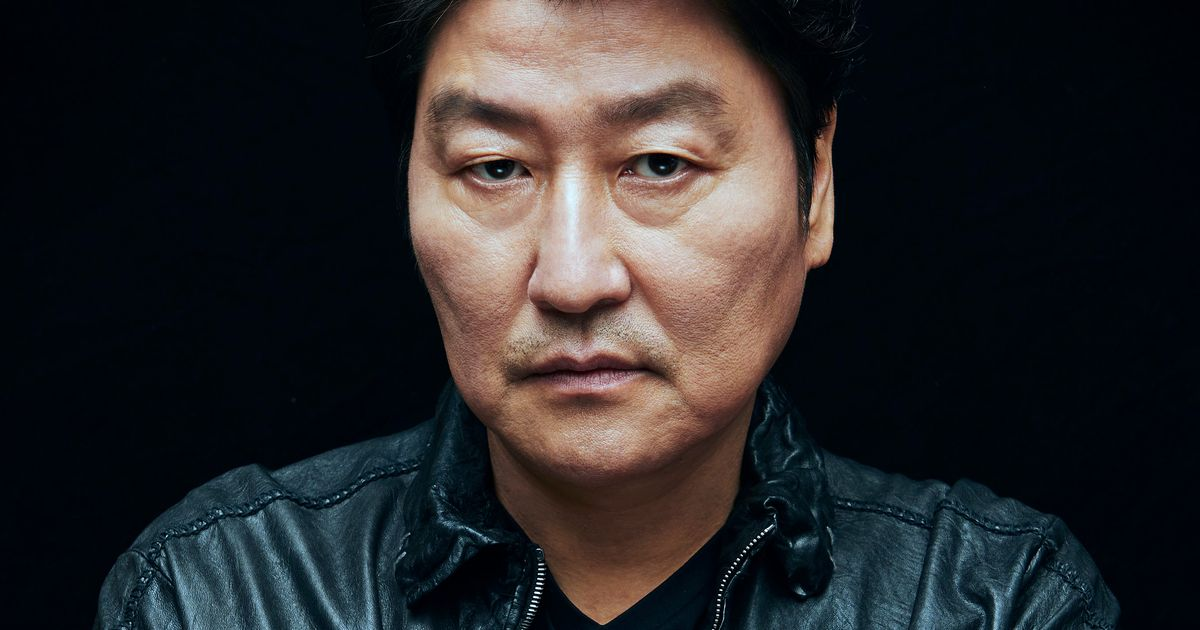

###Director of the exercise: **David Lynch**


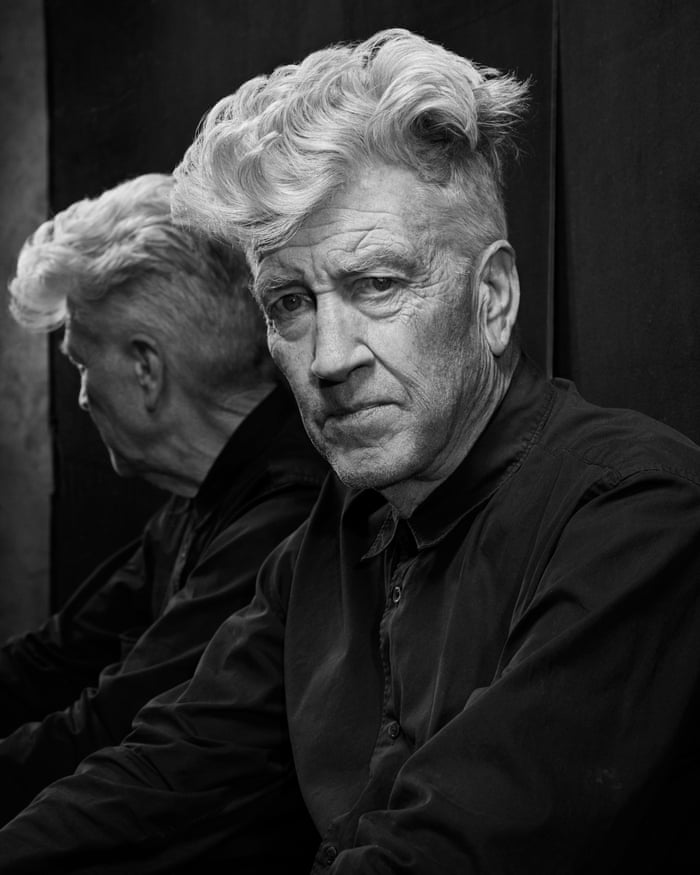

###Movie of the exercise: **The Usual Suspects**

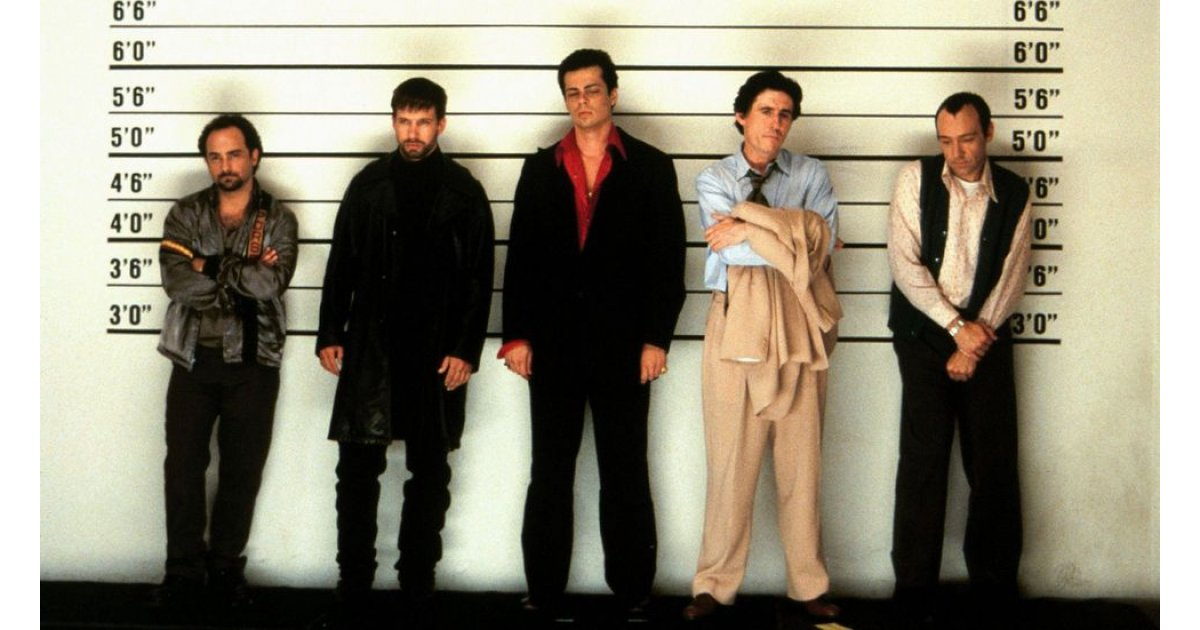

###Any suggestions by you, master?

image.png